In [6]:
!pip list

Package           Version
----------------- -----------
asttokens         2.4.1
colorama          0.4.6
comm              0.2.2
debugpy           1.8.1
decorator         5.1.1
executing         2.0.1
ipykernel         6.29.4
ipython           8.25.0
jedi              0.19.1
jupyter_client    8.6.2
jupyter_core      5.7.2
matplotlib-inline 0.1.7
nest-asyncio      1.6.0
packaging         24.1
parso             0.8.4
pip               23.2.1
platformdirs      4.2.2
prompt_toolkit    3.0.47
psutil            5.9.8
pure-eval         0.2.2
Pygments          2.18.0
python-dateutil   2.9.0.post0
pywin32           306
pyzmq             26.0.3
six               1.16.0
stack-data        0.6.3
tornado           6.4.1
traitlets         5.14.3
wcwidth           0.2.13



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import glob
import random
import imageio.v2 as imageio
import pandas as pd
import matplotlib.pyplot as plt

import cv2

from PIL import Image , ImageFilter




In [2]:
import numpy as np
import os
import itertools
import numpy as np
#import seaborn as sns
"""from keras.models import Sequential
from keras.utils import to_categorical, plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, regularizers, optimizers, callbacks"""
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import glob
import random
import imageio
import PIL, cv2
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.morphology import convex_hull_image, erosion
from skimage.morphology import square
import skimage
from scipy.ndimage import convolve
from PIL import Image,ImageFilter
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
import math

In [11]:
DATA_DIR = 'C:\\ONE_DRIVE_DATA\\Desktop\\GRIET\\AAC\\PROJECT\\INPUT\\SOCOFing_Resized\\Real\\'
list_dirs = list(glob.glob(DATA_DIR + "*.BMP"))
num_images = len(list_dirs)


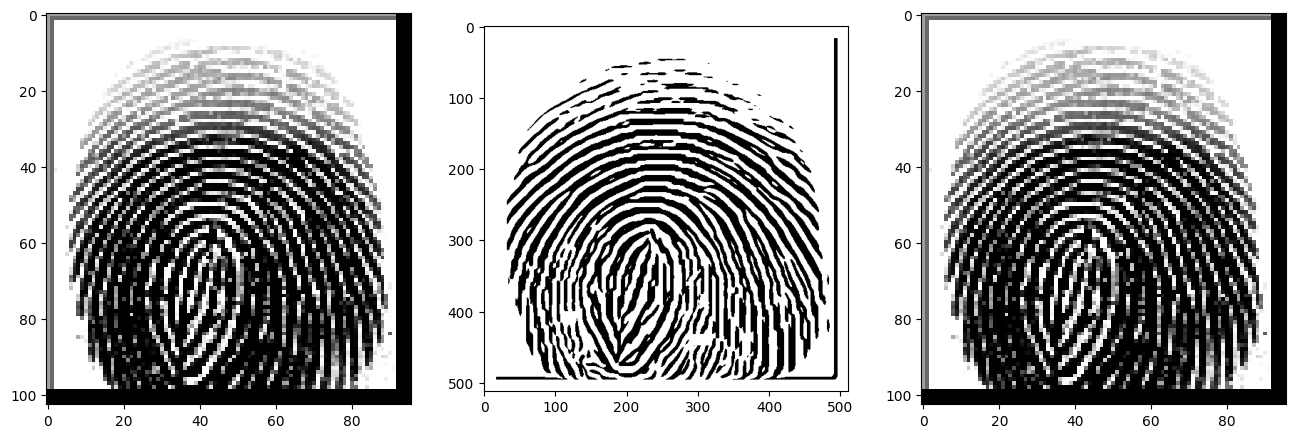

In [12]:
# random.seed(27)
# r = random.randint(0,num_images)
# display_list = list_dirs[r:r+3]


display_list = [ "C:\\ONE_DRIVE_DATA\\Desktop\\GRIET\\AAC\\PROJECT\\CODE\\Fingerprint_Extraction\\library_fn_DATASET.BMP" , 
                "C:\\ONE_DRIVE_DATA\\Desktop\\GRIET\\AAC\\PROJECT\\CODE\\Fingerprint_Extraction\\ENHANCED.bmp",
                "C:\\ONE_DRIVE_DATA\\Desktop\\GRIET\\AAC\\PROJECT\\CODE\\Fingerprint_Extraction\\test_data.bmp",
                "C:\\ONE_DRIVE_DATA\\Desktop\\GRIET\\AAC\\PROJECT\\CODE\\Fingerprint_Extraction\\library_fn.jpg"
]
#image1 = cv2.imread("C:\\ONE_DRIVE_DATA\\Desktop\\GRIET\\AAC\\PROJECT\\CODE\\Fingerprint_Extraction\\library_fn_DATASET.BMP")

# 0 - Library Function Enhancement 
# 1 - Enlarged Dataset Image
# 2 - Original Dataset Image
# 3 - Real World Fingerpring Image
image1 = cv2.imread(display_list[2])
image2 = cv2.imread(display_list[0])
image3 = cv2.imread(display_list[2])

fig, axes = plt.subplots(1,3,figsize = (16,16))

axes[0].imshow(image1)
axes[1].imshow(image2)
axes[2].imshow(image3)

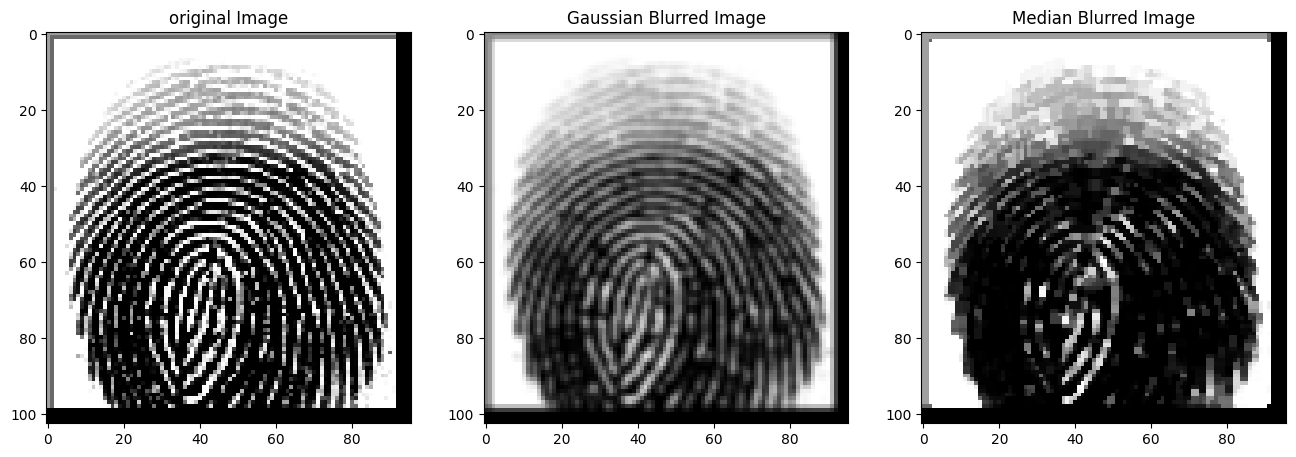

In [54]:
gauss_blur = cv2.GaussianBlur(image1,(3,3),0)
median_blur = cv2.medianBlur(image1,3)

fig, axes = plt.subplots(1,3,figsize = (16,16))

axes[0].set_title("original Image")
axes[0].imshow(image1)

axes[1].set_title("Gaussian Blurred Image")
axes[1].imshow(gauss_blur)

axes[2].set_title("Median Blurred Image")
axes[2].imshow(median_blur)



(array([8181.,  384.,  222.,  180.,  147.,  153.,   90.,  126.,   87.,
          87.,  102.,   84.,   69.,   51.,   63.,   33.,   66.,   84.,
          30.,   87.,   66.,   84.,   54.,   63.,   96.,   51.,   48.,
          54.,   39.,   39.,   66.,   39.,   36.,   36.,   42.,   39.,
          60.,   36.,   42.,   51.,   33.,   36.,   36.,   30.,   42.,
          33.,   39.,   27.,   57.,   45.,   21.,   30.,   27.,   30.,
          48.,   36.,   45.,   27.,   18.,   42.,   27.,   39.,   18.,
          27.,   42.,   18.,   33.,   36.,   36.,   39.,   48.,   48.,
          45.,   42.,   39.,   48.,   27.,   24.,   57.,   30.,   39.,
          36.,   15.,   27.,   30.,   27.,   21.,   27.,   42.,   30.,
          27.,   51.,   48.,   33.,   48.,   30.,   27.,   39.,   21.,
          51.,   33.,   30.,   24.,   45.,   21.,  603.,   15.,   39.,
          51.,   33.,   45.,   45.,   24.,   24.,   27.,   48.,   45.,
          33.,   21.,   27.,   30.,   48.,   24.,   27.,   15.,   33.,
      

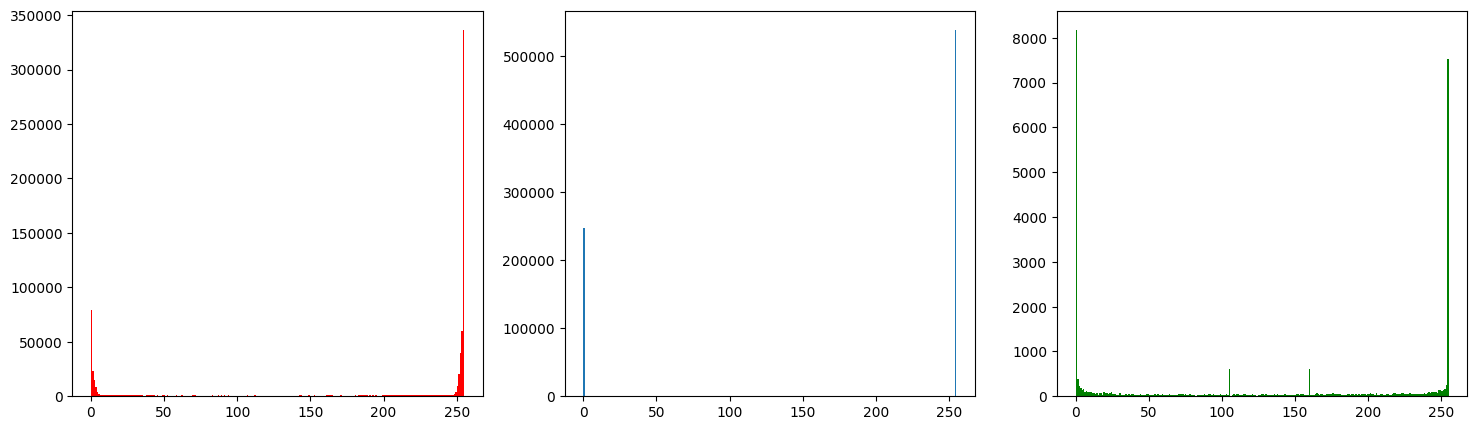

In [42]:
fig , axes = plt.subplots(1,3,figsize=(18,5))

axes[0].hist(image1.ravel(),bins = 256, color = 'r')
axes[1].hist(image2.ravel(),bins = 256)
axes[2].hist(image3.ravel(),bins = 256, color = 'g')


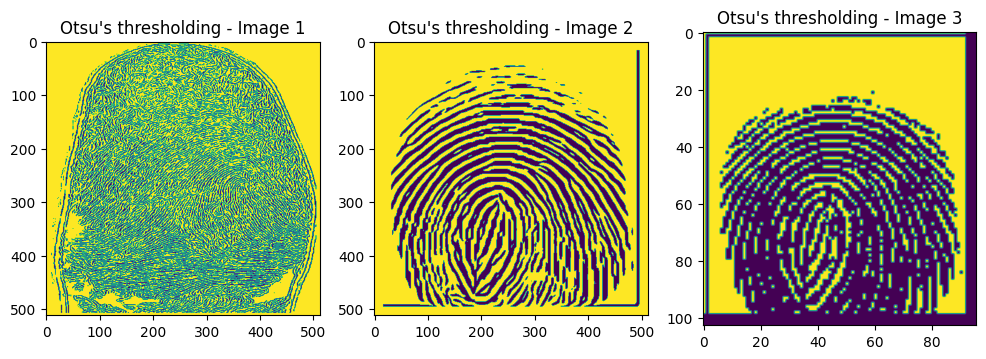

In [44]:
#img1 = cv2.imread(display_list[0],0)                
img1 = cv2.imread(display_list[3],0)                # 0 - GrayScale
img2 = cv2.imread(display_list[0],0) 
img3 = cv2.imread(display_list[2],0)



ret1, th1 = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret2, th2 = cv2.threshold(img2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret3, th3 = cv2.threshold(img3, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

fig , axes = plt.subplots(1,3,figsize = (12,12))
axes[0].set_title("Otsu's thresholding - Image 1")
axes[0].imshow(th1)

axes[1].set_title("Otsu's thresholding - Image 2")
axes[1].imshow(th2)

axes[2].set_title("Otsu's thresholding - Image 3")
axes[2].imshow(th3)

In [49]:
img_name = display_list[3]
#img_name = "C:\\ONE_DRIVE_DATA\\Desktop\\GRIET\\AAC\\PROJECT\\CODE\\Fingerprint_Extraction\\library_fn_DATASET.BMP"
gray_img_array = np.array(Image.open(img_name).convert('P'))

In [50]:
vertical_robert_filter = np.array([[1,0],[0,-1]])
horizontal_robert_filter = np.array([[0,1],[-1,0]])

vertical_sobel_filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
horizontal_sobel_filter = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

vertical_prewitt_filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
horizontal_prewitt_filter = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

print("vertical robert filter\n",vertical_robert_filter )
print("horizontal robert filter\n",horizontal_robert_filter)
print("vertical sobel filter: \n", vertical_sobel_filter)
print("horizontal sobel filter: \n", horizontal_sobel_filter)

print("vertical prewitt filter: \n", vertical_prewitt_filter)
print("horizontal prewitt filter: \n", horizontal_prewitt_filter)

vertical robert filter
 [[ 1  0]
 [ 0 -1]]
horizontal robert filter
 [[ 0  1]
 [-1  0]]
vertical sobel filter: 
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
horizontal sobel filter: 
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
vertical prewitt filter: 
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
horizontal prewitt filter: 
 [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


In [51]:
gray_img = Image.fromarray(gray_img_array)

convolved_img1 = convolve(gray_img,vertical_robert_filter)
convolved_img1 = convolve(convolved_img1,horizontal_robert_filter)

convolved_img2 = convolve(gray_img,vertical_sobel_filter)
convolved_img2 = convolve(convolved_img2,horizontal_sobel_filter)

convolved_img3 =  convolve(gray_img,vertical_prewitt_filter )
convolved_img3 =  convolve(convolved_img3,horizontal_prewitt_filter )

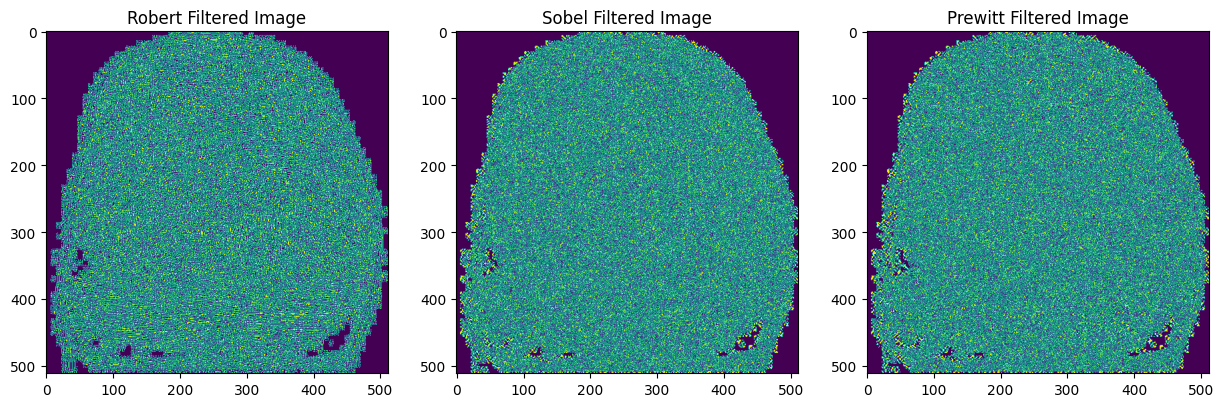

In [52]:
fig, axes = plt.subplots(1,3,figsize = (15,15));
axes[0].set_title("Robert Filtered Image");
axes[0].imshow(convolved_img1);
axes[1].set_title("Sobel Filtered Image");
axes[1].imshow(convolved_img2);
axes[2].set_title("Prewitt Filtered Image");
axes[2].imshow(convolved_img3);

In [3]:
img_size = 500
vertical_prewitt_filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
horizontal_prewitt_filter = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
def load_data(path, train=True):
    print("Loading data from: ", path)
    data = []


    for img in os.listdir(path):
        imgname, ext = os.path.splitext(img)
        ID, etc = imgname.split('__')
        ID = int(ID) - 1
        if train:
            _, lr, finger, _, _ = etc.split('_')
        else:
            _, lr, finger, _  = etc.split('_')
        if lr=='Left':
            base = 0
        else: base  = 5
        if finger=="little":
            fingerNum = base + 0
        elif finger=='ring':
            fingerNum = base + 1
        elif finger=='middle':
            fingerNum = base + 2
        elif finger=='index':
            fingerNum = base + 3 
        else: fingerNum = base + 4
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        #gauss_blur = cv2.GaussianBlur(img_array,(1,1),0)
        #_,th1 = cv2.threshold(gauss_blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        #convolved_img =  convolve(th1,vertical_prewitt_filter )
        #convolved_img =  convolve(convolved_img,horizontal_prewitt_filter )
        img_resize = cv2.resize(img_array, (img_size, img_size))
        data.append([ID, fingerNum, img_resize])
    return data

In [4]:
Altered_path = "C:\\ONE_DRIVE_DATA\\Desktop\\GRIET\\AAC\\PROJECT\\INPUT\\SOCOFing_Resized\\Altered\\Altered-"
Real_path = "C:\\ONE_DRIVE_DATA\\Desktop\\GRIET\\AAC\\PROJECT\\INPUT\\SOCOFing_Resized\\Real"

Easy_data = load_data(Altered_path+'Easy', train=True)
Medium_data = load_data(Altered_path+'Medium', train=True)
Hard_data = load_data(Altered_path+'Hard', train=True)
Real_data = load_data(Real_path, train=False)

#Altered_data = np.concatenate([Easy_data, Medium_data, Hard_data], axis=0)
Altered_data = Easy_data + Hard_data + Medium_data
del Easy_data, Medium_data, Hard_data

Loading data from:  C:\ONE_DRIVE_DATA\Desktop\GRIET\AAC\PROJECT\INPUT\SOCOFing_Resized\Altered\Altered-Easy
Loading data from:  C:\ONE_DRIVE_DATA\Desktop\GRIET\AAC\PROJECT\INPUT\SOCOFing_Resized\Altered\Altered-Medium
Loading data from:  C:\ONE_DRIVE_DATA\Desktop\GRIET\AAC\PROJECT\INPUT\SOCOFing_Resized\Altered\Altered-Hard
Loading data from:  C:\ONE_DRIVE_DATA\Desktop\GRIET\AAC\PROJECT\INPUT\SOCOFing_Resized\Real


In [5]:
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
# from keras.preprocessing.image import ImageDataGenerator
from keras import layers, regularizers, optimizers, callbacks

In [8]:
X_Altered, y_SubjectID_Altered= [], []

for SubjectID, fingerNum, feature in Altered_data:
    X_Altered.append(feature)
    y_SubjectID_Altered.append(SubjectID)

#print(y_SubjectID_Altered[0])
X_Altered = np.array(X_Altered).reshape(-1, img_size, img_size, 1)
#X_Altered = X_Altered / 255.0

for i in range(len(X_Altered)) : 
    X_Altered[i] = X_Altered[i]/255.0


y_SubjectID_Altered = to_categorical(y_SubjectID_Altered, num_classes=800) 

X_SubjectID_train, X_SubjectID_val, y_SubjectID_train, y_SubjectID_val = train_test_split(
    X_Altered, y_SubjectID_Altered, test_size=0.2, random_state=2)

In [9]:
X_test, y_SubjectID_test = [], []

for SubjectID, fingerNum, feature in Real_data:
    X_test.append(feature)
    y_SubjectID_test.append(SubjectID)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)
#X_test = X_test / 255.0
for i in range(len(X_test)):
    X_test[i] = X_test[i] / 255.0

y_SubjectID_test = to_categorical(y_SubjectID_test, num_classes=800)

In [10]:
nets = 1
model = [0] * nets
final_Dense_units = [800,]
model_name = ['SubjectID_Mod', 'FingerNum_Mod']
for i in range(nets):
    model[i] = Sequential(name=model_name[i])

    model[i].add(layers.Conv2D(32, (5, 5), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (500, 500, 1)))
    model[i].add(layers.BatchNormalization())
    model[i].add(layers.MaxPool2D((2, 2)))
    model[i].add(layers.Conv2D(64,(5, 5), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model[i].add(layers.BatchNormalization())
    model[i].add(layers.MaxPool2D((2, 2)))
    model[i].add(layers.Dropout(0.3))
    model[i].add(layers.Flatten())
    model[i].add(layers.Dense(128, activation='relu'))
    model[i].add(layers.Dropout(0.4))
    model[i].add(layers.Dense(final_Dense_units[i], activation='softmax'))

    model[i].compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
    model[i].summary()

c:\Users\Aluri Surya Teja\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "SubjectID_Mod"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 496, 496, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 496, 496, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 248, 248, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 244, 244, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 244, 244, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 122, 122, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 122, 122, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 952576)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │   121,929,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 800)            │       103,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,085,536 (465.72 MB)

 Trainable params: 122,085,344 (465.72 MB)

 Non-trainable params: 192 (768.00 B)

In [20]:
#del X_fingerNum_train, X_fingerNum_val, y_fingerNum_train, y_fingerNum_val

In [19]:
del Altered_data, Real_data, X_Altered

In [2]:
history = [0] * nets
CallBack = [0] * nets
ReduceLR_minlr = [1e-9, 1e-7]
epochs = 20
#batch_size = 64
batch_size = 5
for i in range(nets):
    CallBack[i] = [
        callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1),
        callbacks.ReduceLROnPlateau(factor=0.1, patience=1, min_lr=ReduceLR_minlr[i], verbose=1),
        callbacks.TensorBoard(log_dir="./log_dir/"+model_name[i])]


history[0] = model[0].fit(X_SubjectID_train[:9], y_SubjectID_train[:9],
                    batch_size = batch_size,
                    epochs = epochs, 
                    validation_data = (X_SubjectID_val[:3], y_SubjectID_val[:3]),
                    verbose = 1, callbacks= CallBack[0])
# for i in range(1,39417,13):
#         history[0] = model[0].fit(X_SubjectID_train[i:i+14], y_SubjectID_train[i:i+14],
#                     batch_size = batch_size,
#                     epochs = epochs, 
#                     validation_data = (X_SubjectID_val[i:i+14], y_SubjectID_val[i:i+14]),
#                     verbose = 1, callbacks= CallBack[0])

# history[0] = model[0].fit(X_SubjectID_train, y_SubjectID_train,
#                     batch_size = batch_size,
#                     epochs = epochs, 
#                     validation_data = (X_SubjectID_val, y_SubjectID_val),
#                     verbose = 1, callbacks= CallBack[0])


NameError: name 'nets' is not defined

In [22]:
# X_fingerNum_train, X_fingerNum_val, y_fingerNum_train, y_fingerNum_val = train_test_split(
#     X_Altered, y_fingerNum_Altered, test_size=0.2, random_state=2)
# history[1] = model[1].fit(X_fingerNum_train, y_fingerNum_train,
#                     batch_size = batch_size,
#                     epochs = epochs, 
#                     validation_data = (X_fingerNum_val, y_fingerNum_val),
#                     verbose = 1, callbacks= CallBack[1])


Epoch 1/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 197s 314ms/step - accuracy: 0.3363 - loss: 2.0100 - val_accuracy: 0.5878 - val_loss: 1.2365 - learning_rate: 1.0000e-04
Epoch 2/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 185s 300ms/step - accuracy: 0.5804 - loss: 1.2149 - val_accuracy: 0.7310 - val_loss: 0.8335 - learning_rate: 1.0000e-04
Epoch 3/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 185s 300ms/step - accuracy: 0.7103 - loss: 0.8312 - val_accuracy: 0.8720 - val_loss: 0.4904 - learning_rate: 1.0000e-04
Epoch 4/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 186s 302ms/step - accuracy: 0.8036 - loss: 0.5836 - val_accuracy: 0.9096 - val_loss: 0.3569 - learning_rate: 1.0000e-04
Epoch 5/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 185s 301ms/step - accuracy: 0.8654 - loss: 0.4175 - val_accuracy: 0.9613 - val_loss: 0.1997 - learning_rate: 1.0000e-04
Epoch 6/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 185s 301ms/step - accuracy: 0.9039 - loss: 0.3217 - val_accuracy: 0.9790 - val_loss: 0.1321 - learning_rate: 1.0000e-04
Epoch 7/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 

In [22]:
acc = [0,] * nets
val_acc = [0,] * nets
loss = [0,] * nets
val_loss = [0,] * nets
for i in range(nets):
    acc[i] = history[i].history['accuracy']
    val_acc[i] = history[i].history['val_accuracy']
    loss[i] = history[i].history['loss']
    val_loss[i] = history[i].history['val_loss']

    epochs = range(1, len(acc[i]) + 1)
    plt.figure()
    plt.plot(epochs, acc[i], label='Training acc of '+model_name[i])
    plt.plot(epochs, val_acc[i], label='Validation acc of '+model_name[i])
    plt.plot(epochs, loss[i], label='Training loss of '+model_name[i])
    plt.plot(epochs, val_loss[i], label='Validation loss of '+model_name[i])
    plt.title('Training and validation accuracy of '+model_name[i])
    plt.legend()

testing_acc_Id = model[0].evaluate([X_test], [y_SubjectID_test], verbose=0)
print("Id recognition accuracy: ",testing_acc_Id[1]*100, "%")


AttributeError: 'int' object has no attribute 'history'

In [33]:
from keras.models import save_model 
model[0].save("CNN_MODEL.h5")

In [ ]:
#MODEL DONE 

#BELOW CODE IS FOR USER INPUT MATCHING

In [2]:
from keras.models import load_model
MODEL = load_model("CNN_MODEL.h5")
#testing_acc_Id = MODEL.evaluate([X_test], [y_SubjectID_test], verbose=0)
#print("Id recognition accuracy: ",testing_acc_Id[1]*100, "%")

In [166]:
user_path = "C:\\ONE_DRIVE_DATA\\Desktop\\GRIET\\AAC\\PROJECT\\INPUT\\TEST\\USER_INP"
user_data = load_data(user_path, train=True)

Loading data from:  C:\ONE_DRIVE_DATA\Desktop\GRIET\AAC\PROJECT\INPUT\TEST\USER_INP


In [167]:
DB_path = "C:\\ONE_DRIVE_DATA\\Desktop\\GRIET\\AAC\\PROJECT\\INPUT\\TEST\\DB"
db_datas = load_data(DB_path,train = False)

Loading data from:  C:\ONE_DRIVE_DATA\Desktop\GRIET\AAC\PROJECT\INPUT\TEST\DB


In [171]:
#TRUE INPUT DATA
img_size = 96
inp_data = user_data[4]
print(inp_data)
inp_features = np.array(inp_data[2]).reshape(-1, img_size, img_size, 1)
inp_features = inp_features/255.0
#print(inp_features)
inp_id = to_categorical(inp_data[0],num_classes = 10) #to_categorical([db_data[0],], num_classes=600)
print(inp_id)


[0, 9, array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [124]:
#FALSE INPUT DATA
inp_data = user_data[1]
print(inp_data)
inp_features = np.array(inp_data[2]).reshape(-1, img_size, img_size, 1)
inp_features = inp_features/255.0
#print(inp_features)
inp_id = to_categorical(inp_data[0],num_classes = 10) 
print(inp_id)


[0, 4, array([[166, 163, 160, ..., 188, 191, 191],
       [159, 168, 156, ..., 195, 198, 196],
       [157, 163, 163, ..., 196, 196, 206],
       ...,
       [141, 140, 144, ..., 128, 143, 150],
       [143, 145, 138, ..., 129, 138, 154],
       [148, 145, 142, ..., 133, 139, 152]], dtype=uint8)]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [101]:
# WOKRING : SINGLE DB IMAGE MATCHING
db_data= db_datas[0]
print(db_data)
db_features = np.array(db_data[2]).reshape(-1, img_size, img_size, 1)
db_features = db_features/255.0
db_ID = to_categorical([db_data[0],], num_classes=10)
print(db_ID) 

[0, 3, array([[160, 158, 158, ...,   0,   0,   0],
       [160, 105, 121, ...,   0,   0,   0],
       [160, 105, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
db_data= db_datas[1]
print(db_data)
db_features = np.array(db_data[2]).reshape(-1, img_size, img_size, 1)
db_features = db_features/255.0
db_ID = to_categorical([db_data[0],], num_classes=10)
print(db_ID) 

In [14]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [15]:
predicted_data = MODEL.predict([inp_features])

err = r2_score(db_ID,predicted_data)
print(predicted_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
[[3.49123265e-11 2.59919395e-11 1.09271231e-10 3.28367628e-12
  7.74114142e-07 9.99947667e-01 1.13704962e-10 2.31049164e-12
  2.74120560e-10 5.48972756e-10 2.50805670e-13 4.03139531e-08
  9.26684185e-13 6.33232290e-13 2.38215647e-09 8.82648329e-11
  7.04016969e-08 4.01291604e-11 2.85209161e-12 1.06500963e-11
  3.49048390e-09 1.44812851e-09 1.21869434e-07 5.67443958e-09
  2.05962033e-06 1.30922037e-10 1.17049104e-09 1.67496891e-10
  5.44205703e-09 3.23888111e-10 1.45615104e-07 1.03874902e-10
  4.59021408e-08 2.37898701e-09 3.13304760e-09 6.08929660e-12
  1.33590023e-11 4.81330642e-10 3.10075576e-12 3.19153437e-09
  2.44417144e-08 5.04328000e-07 6.14025194e-12 1.76318432e-10
  2.67187095e-09 1.46993338e-11 2.85377989e-11 6.21969365e-10
  3.86641474e-09 7.34863281e-10 1.75534551e-14 5.42558221e-11
  4.52678936e-11 4.18362636e-11 7.41331788e-11 2.99721886e-10
  1.68208416e-08 6.14520761e-12 9.44073761e-08 4.23556372e-12
  1.91573548e-08 2.52775294e-08

c:\Users\Aluri Surya Teja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [16]:
err = mean_squared_error(db_ID,predicted_data)


In [17]:
print(err)

0.003333158895097611


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
ID REAL =  0 
ID PREDICTED =  5
Oops! Prediction is wrong!


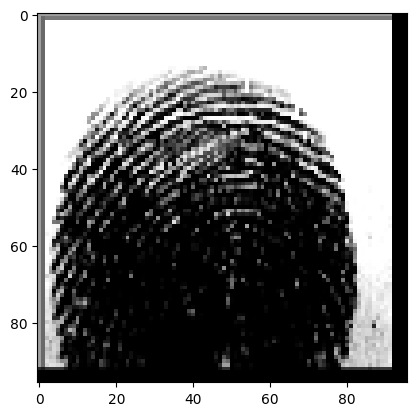

In [102]:
#WORKINGGGGGGGGGGGG   : SINGLE DB MATCHING



rand_fp_num = 0
plt.imshow(inp_features.reshape((96, 96)), cmap ='gray')
y_SubjectID_pred = MODEL.predict(inp_features)
y_SubjectID_test = db_ID
#print(y_SubjectID_pred)
#print(y_SubjectID_test )


Id_pred = np.argmax(y_SubjectID_pred)
Id_real = np.argmax(y_SubjectID_test)

print('ID REAL = ',Id_real,"\nID PREDICTED = ",Id_pred)
if Id_pred==Id_real:
    print("Infomation confirm! Fingerprint matches: person Id",Id_pred)
else:
    print("Oops! Prediction is wrong!")

In [165]:
print(db_datas[0])

[12, 8, array([[160, 158, 158, ...,   0,   0,   0],
       [160, 105, 121, ...,   0,   0,   0],
       [160, 105, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
PREDICTED ID :  486
DATABASE ID :  12
DATABASE ID :  15
DATABASE ID :  0
DATABASE ID :  0
DATABASE ID :  0
DATABASE ID :  8
PERSON DOES NOT EXIST IN DATABASE


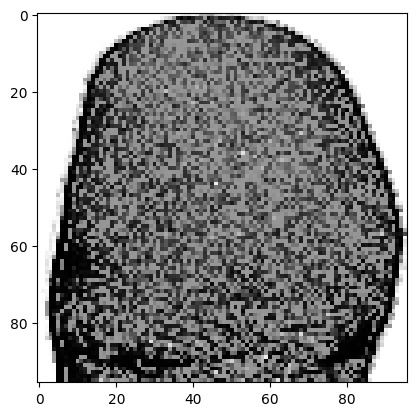

In [172]:
rand_fp_num = 0
plt.imshow(inp_features.reshape((96, 96)), cmap ='gray')

y_SubjectID_pred = MODEL.predict(inp_features)
Id_pred = np.argmax(y_SubjectID_pred)

print('PREDICTED ID : ',Id_pred)

#print(y_SubjectID_pred)
#print(y_SubjectID_test )

dec = 0
for db_data in db_datas:
    db_features = np.array(db_data[2]).reshape(-1, img_size, img_size, 1)
    db_features = db_features/255.0
    db_ID = to_categorical([db_data[0],], num_classes=600)
    y_SubjectID_test = db_ID
    Id_real = np.argmax(y_SubjectID_test)
    print('DATABASE ID : ',Id_real)
    if Id_pred==Id_real:
        print("Infomation confirm! Fingerprint matches: person Id",Id_pred)

        cv2.waitKey(0)
        cv2.destroyAllWindows()

        dec = 1
        break
if dec == 0 :
    print("PERSON DOES NOT EXIST IN DATABASE")










